In [1]:
import pandas as pd #used for reading csv as dataframe and performing operations on dataframe
import numpy as np #library used for numerical operations in python
import matplotlib.pyplot as plt #used for data visulaisation and graph plotting
import seaborn as sns #Seaborn is a data visualization library based on matplotlib

#importing the zomato dataset
df=pd.read_csv(r"/content/zomato.csv",encoding="latin-1") 
#printing the dataset
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                           

In [2]:
#printing the shape of the dataset
print(df.shape)

(9551, 21)


In [3]:
#printing all the columns in the dataset
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [4]:
#printing the information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
#print the description of the dataset
#all the neumerical columns will show the mean,max,percentile value
print(df.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [6]:
#printing the null columns with null values from the columns
print(df.isnull().sum())
# as there are null values in "Cuisines" column

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [7]:
# we have another datasheet in which country with code
df_country=pd.read_csv(r"/content/Country-Code.csv")
print(df_country)

    Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States


In [8]:
#to print top 5 entries from file
print(df_country.head())

   Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia


In [9]:
#combining the two file
final_df=pd.merge(df,df_country, on="Country Code", how="left") #we are performing left join
print(final_df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [10]:
#now we will count which country has how many orders
country_order=final_df["Country"].value_counts()
#printing the top 5 country with order
print(country_order.head())

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
Name: Country, dtype: int64


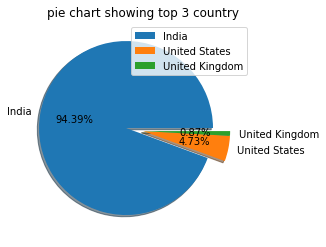

In [11]:
#from above we can see that India has highest number of order for Zomato
#plotting the pie chart of top 3 country with order value

plt.title ("pie chart showing top 3 country")
scat=np.array([0.2,0,0])
plt.pie(country_order[:3],labels=country_order.index[:3],autopct= "%1.2f%%",explode= scat,shadow=True)
plt.legend(country_order.index[:3])

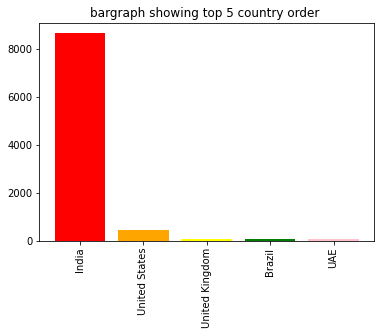

In [12]:
#plotting bar graph for number of orders
plt.title ("bargraph showing top 5 country order ")
color=np.array(["red","orange","yellow","green","pink"])
plt.bar(country_order.index[:5], country_order[:5],color=color )
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

In [13]:
#creatings another dataframe so that we can compare that for other countries
ratings=final_df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns={0:"values"})
print(ratings)

    Aggregate rating Rating color Rating text  values
0                0.0        White   Not rated    2148
1                1.8          Red        Poor       1
2                1.9          Red        Poor       2
3                2.0          Red        Poor       7
4                2.1          Red        Poor      15
5                2.2          Red        Poor      27
6                2.3          Red        Poor      47
7                2.4          Red        Poor      87
8                2.5       Orange     Average     110
9                2.6       Orange     Average     191
10               2.7       Orange     Average     250
11               2.8       Orange     Average     315
12               2.9       Orange     Average     381
13               3.0       Orange     Average     468
14               3.1       Orange     Average     519
15               3.2       Orange     Average     522
16               3.3       Orange     Average     483
17               3.4       O

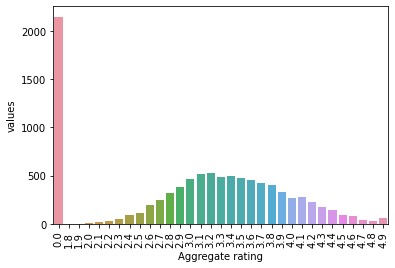

In [14]:
sns.barplot(x="Aggregate rating",y="values",data=ratings)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

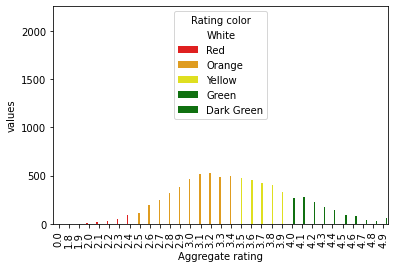

In [15]:
sns.barplot(x="Aggregate rating",y="values",hue="Rating color",data=ratings,palette=["white","red","orange","yellow","green","green"])
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

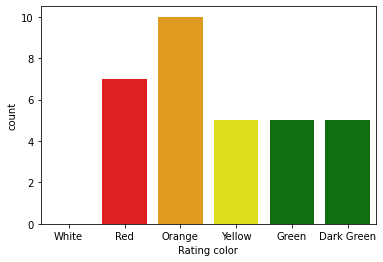

In [16]:
sns.countplot (x="Rating color",data=ratings,palette=["white","red","orange","yellow","green","green"])
plt.show()

In [17]:
#analyzing which country has given how many 0 ratings
zero_rat=final_df[final_df["Rating color"]=="White"].groupby("Country").size().reset_index()
print(zero_rat)

          Country     0
0          Brazil     5
1           India  2139
2  United Kingdom     1
3   United States     3


In [18]:
#which country use which currency for payment
curr_count=final_df[["Country","Currency"]].groupby (["Country","Currency"]).size().reset_index()
print(curr_count)

           Country                Currency     0
0        Australia               Dollar($)    24
1           Brazil      Brazilian Real(R$)    60
2           Canada               Dollar($)     4
3            India      Indian Rupees(Rs.)  8652
4        Indonesia  Indonesian Rupiah(IDR)    21
5      New Zealand           NewZealand($)    40
6      Phillipines        Botswana Pula(P)    22
7            Qatar         Qatari Rial(QR)    20
8        Singapore               Dollar($)    20
9     South Africa                 Rand(R)    60
10       Sri Lanka   Sri Lankan Rupee(LKR)    20
11          Turkey        Turkish Lira(TL)    34
12             UAE      Emirati Diram(AED)    60
13  United Kingdom              Pounds(£)    80
14   United States               Dollar($)   434


In [19]:
#which country has online delivery
online=final_df[["Has Online delivery","Country"]].groupby(["Has Online delivery","Country"]).size().reset_index()
print(online)

   Has Online delivery         Country     0
0                   No       Australia    24
1                   No          Brazil    60
2                   No          Canada     4
3                   No           India  6229
4                   No       Indonesia    21
5                   No     New Zealand    40
6                   No     Phillipines    22
7                   No           Qatar    20
8                   No       Singapore    20
9                   No    South Africa    60
10                  No       Sri Lanka    20
11                  No          Turkey    34
12                  No             UAE    32
13                  No  United Kingdom    80
14                  No   United States   434
15                 Yes           India  2423
16                 Yes             UAE    28
